In [30]:
import pandas as pd
import numpy as np
# 기계학습
from sklearn import datasets
d = datasets.load_iris()
print(d.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
from sklearn import svm
s = svm.SVC(gamma=0.1,C=10)
s.fit(d.data,d.target)

SVC(C=10, gamma=0.1)

In [9]:
d.data.shape

(150, 4)

In [12]:
# 예측을 하려면 학습한 형태로 데이터를 전달해야 함
new_d = [[10.5, 8.3, 20.5, 16.8]]
predict = s.predict(new_d)
predict

array([2])

In [19]:
new_d = [[7.5, 3.3, 4.2, 1.8]]
predict = s.predict(new_d)
predict

array([1])

In [20]:
# 원샷 학습
# 레이블이 있는 셈플을 하나만 사용하는 것을 1-shot learning
# 퓨샷 학습
# 몇개의 셈플을 사용하는 것을 few-shot learning
# 준지도 학습
#소량의  셈플과 레이블이 없는 대량의 샘플을 같이 사용 semi-supervised learning

In [50]:
newData = np.concatenate( (d.data, d.target.reshape(-1,1)),axis = 1)
df = pd.DataFrame(newData,columns=d.feature_names + ["class"])
df.head()
fig = px.scatter_3d(df, x= 'sepal length (cm)',y='sepal width (cm)',z='petal length (cm)',color = 'class')
fig.show(renderer = "browser")


In [51]:
temp = pd.DataFrame(d.data,columns=d.feature_names)
temp['class'] = d.target
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
import plotly.express as px
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [25]:
fig = px.scatter_3d(df, x= 'sepal_length',y='sepal_width',z='petal_length',color = 'species')
fig.show(renderer = "browser")

In [52]:
# 영상 데이터
# 필기 숫자 데이터
# sklearn  8*8      1797 sample
# MNIST     28*28   7만개 sample 

In [54]:
import matplotlib.pylab as plt
digit = datasets.load_digits()
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

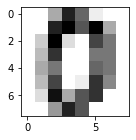

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [59]:
plt.figure(figsize=(2,2))
#plt.show(digit.images[0],cmap="gray_r")
plt.imshow(digit.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()
print(digit.data[0]) # 화소값

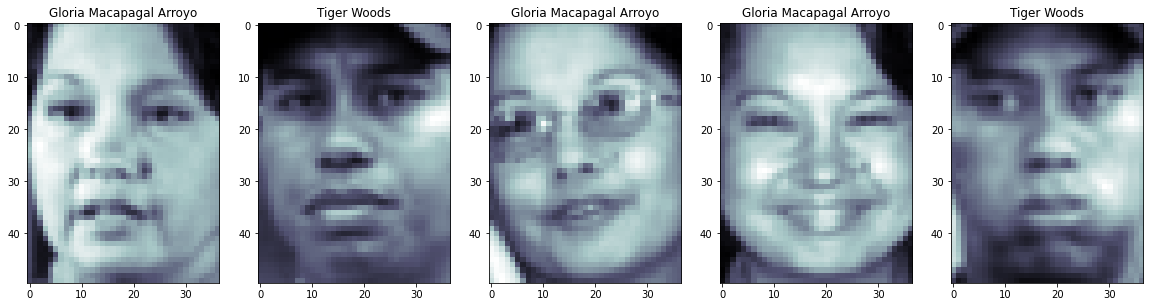

In [92]:
# 유명인의 얼굴데이터
lfw = datasets.fetch_lfw_people(min_faces_per_person=20,resize=0.4)
plt.figure(figsize=(20,5))

for i in range(10,15):
    plt.subplot(1,5,i%10+1)
    plt.imshow(lfw.images[i], cmap=plt.cm.bone)
    plt.title(lfw.target_names[lfw.target[i]])

plt.show()


In [98]:
# news 데이터 - 순환신경망을 이용
# 웹에서 수집한 문서를 20개 부류로 구분, 텍스트로 구성되어서 각 샘플의 길이가 다름
# 시계열데이터(단어가 나타나는 순서가 중요)

news = datasets.fetch_20newsgroups(subset='train')
# print(news[0])
# print("문서의 부류는 "+news.target_names[news.target[0]])
print(news.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [99]:
# 테이터수집 --> EDA(특징 추출) ->모델링->예측

In [100]:
# 분별력
# 머신러닝(기계 학습) - 높은 분별력을 가지는 특징을 사용해야

In [103]:
# SVC
from sklearn import svm
digit = datasets.load_digits()
# SVC 모델을 학습
s = svm.SVC(gamma=0.1, C=10)
s.fit(digit.data, digit.target)

SVC(C=10, gamma=0.1)

In [107]:
new_d = [digit.data[0],digit.data[1],digit.data[2]]
predict = s.predict(new_d)
print("예측값" , predict)
print("실제 값 " , digit.target[0], digit.target[1],digit.target[2])

예측값 [0 1 2]
실제 값  0 1 2


In [109]:
# 예측값
predict =  s.predict(digit.data)
# 정확히 예측한 값
corrent = [i for i in range(len(predict)) if predict[i] == digit.target[i]]
acuuracy = len(corrent) / len(predict)
print(f"화소 특징을 사용했을때의 정확율 = {acuuracy*100}%")

화소 특징을 사용했을때의 정확율 = 100.0%


In [110]:
# 객관적인 성능 측정의 필요성
# 모델선택의 기준
# 실제 개발완료의 기준

# confusion matrix  혼동 행렬
'''
부류가 2개인 경우
p:positive
n:nagative

      그라운드 트루스(참값)
           긍정    부정
예측 긍정  TP      FP
예측 부정  FN      TN      
'''
# 이진분류의 사용 예....... 환자 정상 / 불량품 양품 
# TP FP  FN  TN
'''
accuracy 정확율:   부류가 불균형일때 성능을 제대로 반영 못함
 = 맞힌셈플수 / 전체샘플수      대각선 샘플수 / 전체샘플수
 
특이도(specificity)와 민감도(sensitivity) --> 의료에서 사용함
특이도 TN / TN + FP  민감도 TP / TP + FN

정밀도(precision) 와 재현률(recal) -> 정보검색
정밀도 TP / TP + FP   재현률 TP / TP + FN
'''

'\naccuracy 정확율:   부류가 불균형일때 성능을 제대로 반영 못함\n = 맞힌셈플수 / 전체샘플수      대각선 샘플수 / 전체샘플수\n \n특이도(specificity)와 민감도(sensitivity) --> 의료에서 사용함\n특이도 TN / TN + FP  민감도 TP / TP + FN\n\n정밀도(precision) 와 재현률(recal) -> 정보검색\n정밀도 TP / TP + FP   재현률 TP / TP + FN\n'

In [111]:
# 모델 선택 포함 : 훈련/검증/테스트 집합으로 나눔
# 모델 선택 미포함 : 훈련 / 테스트

In [186]:
# 모델 미 선택
# 필기체 데이터를 분할
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target = train_test_split(digit.data, digit.target, test_size=0.2,random_state=42)

In [187]:
s =  svm.SVC(gamma=0.001)
s.fit(x_train,y_train)
predict = s.predict(x_target)

In [188]:
np.unique( predict), np.unique(y_target)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [189]:
# 혼돈 행렬
conf = np.zeros((10,10))

In [190]:
len(predict)

360

In [191]:
for i in range(len(predict)):
    conf[predict[i]][y_target[i]]+= 1
print(conf)    

[[33.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 28.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 33.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 46.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 35.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 33.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 30.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0. 39.]]


In [192]:
# 정확율
no_correct = 0
# confusion matrix에 대각선의 합
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct / len(predict)    
print(f"태스트 집합에 대한 정확율 : {accuracy*100}% 입니다")

태스트 집합에 대한 정확율 : 98.88888888888889% 입니다


In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(predict,y_target)
print(f"태스트 집합에 대한 정확율 : {accuracy_score(predict,y_target)*100}% 입니다")

태스트 집합에 대한 정확율 : 98.88888888888889% 입니다


In [194]:
# 지금까지의 문제점
# 난수를 사용하기 때문에 실행할때마다 다른 결과가 발생
# 난수를 고정시킨다

In [195]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [196]:
accuracies =  cross_val_score(s,digit.data,digit.target,cv=5)
print(f"정확율(평균) : {accuracies.mean()*100}  표준편차 : {accuracies.std()}")

정확율(평균) : 97.21866295264624  표준편차 : 0.015013488295959767
